<a href="https://colab.research.google.com/github/MatthewMacDougall/AI-Publishing-Work/blob/main/AI_Publishing_9_%2B_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

In [5]:
# reading data from CSV file
banknote_data = pd.read_csv("bank_notes.csv")

In [6]:
banknote_data.head()

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
banknote_data.shape

(1372, 5)

<Axes: xlabel='Target', ylabel='count'>

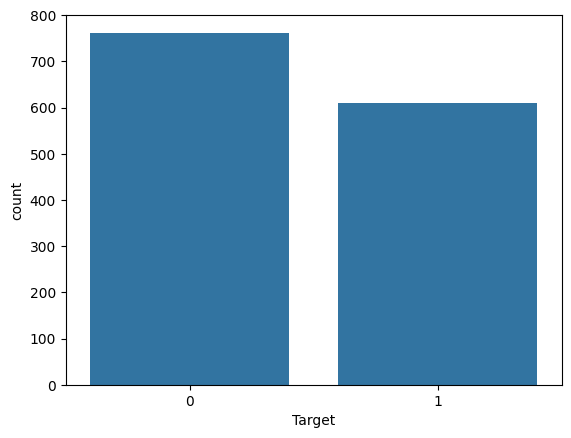

In [8]:
sns.countplot(x="Target", data=banknote_data)

In [9]:
X = banknote_data.drop(["Target"], axis=1).values
y = banknote_data[["Target"]].values

print(X.shape, y.shape)

(1372, 4) (1372, 1)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
def create_model(learning_rate, dropout_rate):
# create sequential model
    model = Sequential()
# adding dense layers
    model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
# compiling the model
    adam = Adam(lr=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [14]:
dropout_rate = 0.1
epochs = 20
batch_size = 4
learn_rate = 0.001

In [15]:
model = create_model(learn_rate, dropout_rate)

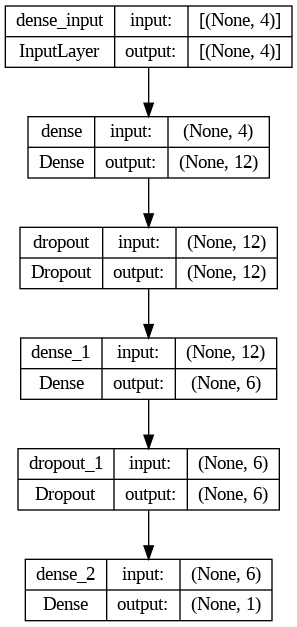

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [17]:
model_history = model.fit(X_train, y_train, batch_size=batch_size,
                          epochs=epochs, validation_split=0.2, verbose=1)

Epoch 1/20
220/220 [==============================] - 1s 2ms/step - loss: 0.6132 - accuracy: 0.7434 - val_loss: 0.5049 - val_accuracy: 0.8909
Epoch 2/20
220/220 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.8917 - val_loss: 0.2700 - val_accuracy: 0.9318
Epoch 3/20
220/220 [==============================] - 1s 3ms/step - loss: 0.2296 - accuracy: 0.9361 - val_loss: 0.1361 - val_accuracy: 0.9591
Epoch 4/20
220/220 [==============================] - 1s 6ms/step - loss: 0.1480 - accuracy: 0.9498 - val_loss: 0.0837 - val_accuracy: 0.9773
Epoch 5/20
220/220 [==============================] - 1s 6ms/step - loss: 0.1236 - accuracy: 0.9567 - val_loss: 0.0555 - val_accuracy: 0.9864
Epoch 6/20
220/220 [==============================] - 1s 4ms/step - loss: 0.0981 - accuracy: 0.9590 - val_loss: 0.0421 - val_accuracy: 0.9864
Epoch 7/20
220/220 [==============================] - 1s 3ms/step - loss: 0.0880 - accuracy: 0.9624 - val_loss: 0.0327 - val_accuracy: 1.0000
Epoch 

In [18]:
accuracies = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", accuracies[0])
print("Test Accuracy:", accuracies[1])

9/9 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 1.0000
Test Score: 0.008946707472205162
Test Accuracy: 1.0


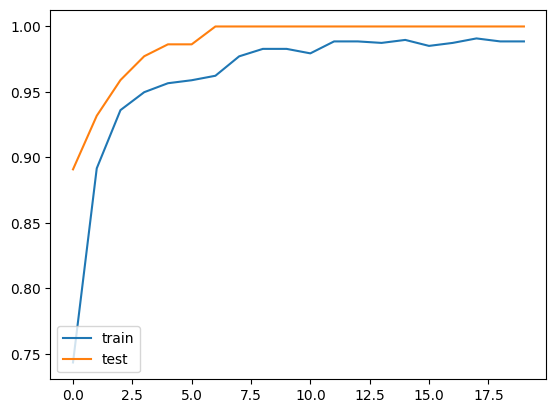

In [20]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'], label = 'accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(['train', 'test'], loc='lower left')

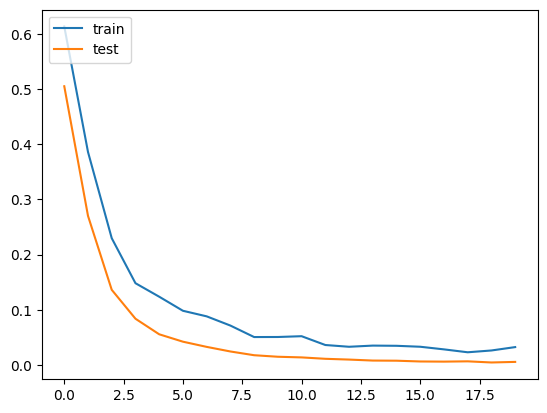

In [21]:
plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label='val_loss')
plt.legend(['train', 'test'], loc='upper left')

In [76]:
# importing dataset
fb_complete_data = pd.read_csv("fb_train.csv")
fb_complete_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.366852,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.108192,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.069290,27399300
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.069290,22045300
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.097137,23961000


In [77]:
# filtering open column
fb_training_processed = fb_complete_data[["Open"]].values

In [78]:
# scaling features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

fb_training_scaled = scaler.fit_transform(fb_training_processed)

In [79]:
len(fb_training_scaled)

1257

In [80]:
# training features contain data of last 60 days
# training labels contain data of 61st day

fb_training_features = []
fb_training_labels = []
for i in range(60, len(fb_training_scaled)):
    fb_training_features.append(fb_training_scaled[i-60:i, 0])
    fb_training_labels.append(fb_training_scaled[i, 0])

In [45]:
# converting training data to numpy arrays
X_train = np.array(fb_training_features)
y_train = np.array(fb_training_labels)

print(X_train.shape, y_train.shape)

(1197, 60) (1197,)


In [81]:
# converting data into 3D shape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [47]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Activation, Dense, Flatten, Dropout, Flatten, LSTM
from tensorflow.keras.models import Model

In [103]:
# defining the LSTM network

input_layer = Input(shape = (X_train.shape[1], 1))
lstm1 = LSTM(100, activation='relu', return_sequences=True)(input_layer)
do1 = Dropout(0.2)(lstm1)
lstm2 = LSTM(100, activation='relu', return_sequences=True)(do1)
do2 = Dropout(0.2)(lstm2)
lstm3 = LSTM(100, activation='relu', return_sequences=True)(do2)
do3 = Dropout(0.2)(lstm3)
lstm4 = LSTM(100, activation='relu')(do3)
do4 = Dropout(0.2)(lstm4)

output_layer = Dense(1)(do4)
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')

print(X_train.shape, y_train.shape)

(1197, 60, 1) (1197, 1)


In [104]:
y_train = y_train.reshape(-1, 1)
print(y_train.shape)

(1197, 1)


In [105]:
# training the model
model_history = model.fit(X_train, y_train, epochs=100, verbose=1, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 9s 118ms/step - loss: 0.0656
Epoch 2/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0092
Epoch 3/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0074
Epoch 4/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0072
Epoch 5/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0069
Epoch 6/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0063
Epoch 7/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0058
Epoch 8/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0056
Epoch 9/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0053
Epoch 10/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0051
Epoch 11/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0053
Epoch 12/100
38/38 [==============================] - 6s 145ms/step - loss: 0.0043
Epoch 13/100


In [106]:
# creating test set
fb_testing_complete_data = pd.read_csv("fb_test.csv")
fb_testing_processed = fb_testing_complete_data[["Open"]].values

In [107]:
fb_all_data = pd.concat((fb_complete_data['Open'], fb_testing_complete_data['Open']), axis=0)

In [108]:
test_inputs = fb_all_data[len(fb_all_data) - len(fb_testing_complete_data) - 60:].values
print(test_inputs.shape)

(80,)


In [109]:
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)
print(test_inputs.shape)

(80, 1)


In [110]:
fb_test_features = []
for i in range(60, 80):
    fb_test_features.append(test_inputs[i-60:i, 0])

In [111]:
X_test = np.array(fb_test_features)
print(X_test.shape)

(20, 60)


In [112]:
# converting test data into 3D shape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(20, 60, 1)


In [113]:
# making predictions on test set
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 461ms/step


In [114]:
# converting scaled data back to original data
y_pred = scaler.inverse_transform(y_pred)

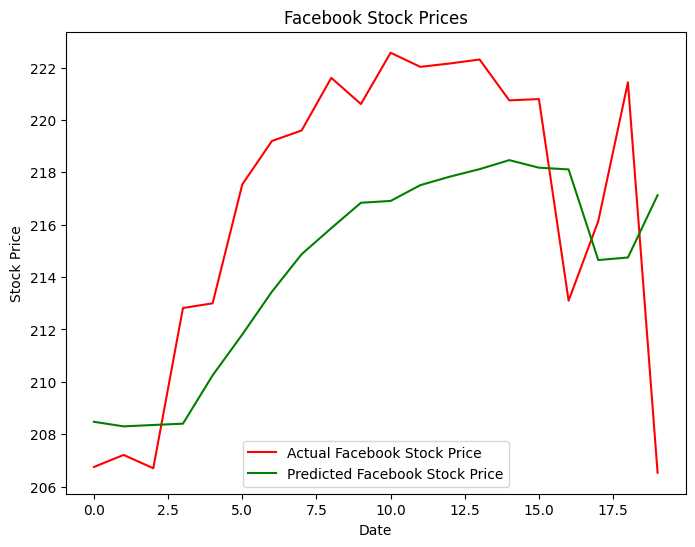

In [115]:
# plotting original and predicted stock values
plt.figure(figsize=(8,6))
plt.plot(fb_testing_processed, color='red', label='Actual Facebook Stock Price')
plt.plot(y_pred, color='green', label='Predicted Facebook Stock Price')
plt.title('Facebook Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [116]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPool2D
from tensorflow.keras.models import Model

In [117]:
# importing mnist database
mnist_data = tf.keras.datasets.fashion_mnist

# dividing data into training and test sets
(training_images, training_labels), (test_images, test_labels) = mnist_data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [119]:
# scaling images
training_images, test_images = training_images/255.0, test_images/255.0

In [120]:
print(training_images.shape)

(60000, 28, 28)


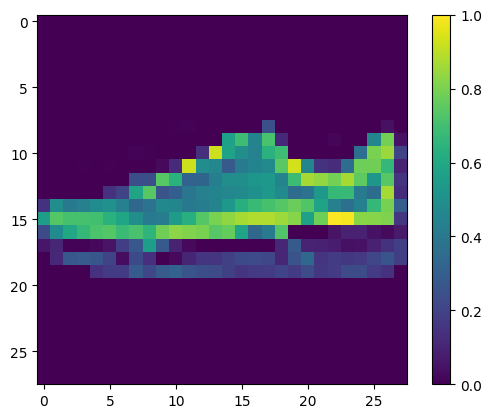

In [121]:
# plotting image number 9 from test set
plt.figure()
plt.imshow(test_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

In [122]:
# converting data into the right shape
training_images = np.expand_dims(training_images, -1)
test_images = np.expand_dims(test_images, -1)
print(training_images.shape)

(60000, 28, 28, 1)


In [123]:
# printing number of output classes
output_classes = len(set(training_labels))
print("Number of output classes is: ", output_classes)

Number of output classes is:  10


In [124]:
training_images[0].shape

(28, 28, 1)

In [126]:
# Developing the CNN model

input_layer = Input(shape = training_images[0].shape)
conv1 = Conv2D(32, (3, 3), strides = 2, activation = 'relu')(input_layer)
maxpool1 = MaxPool2D(2, 2)(conv1)
conv2 = Conv2D(64, (3, 3), strides = 2, activation = 'relu')(maxpool1)
#conv3 = Conv2D(128, (3, 3), strides = 2, activation = 'relu')(conv2)
flat1 = Flatten()(conv2)
drop1 = Dropout(0.2)(flat1)
dense1 = Dense(512, activation='relu')(drop1)
drop2 = Dropout(0.2)(dense1)
output_layer = Dense(output_classes, activation='softmax')(drop2)

model = Model(input_layer, output_layer)

In [127]:
# compiling the CNN model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

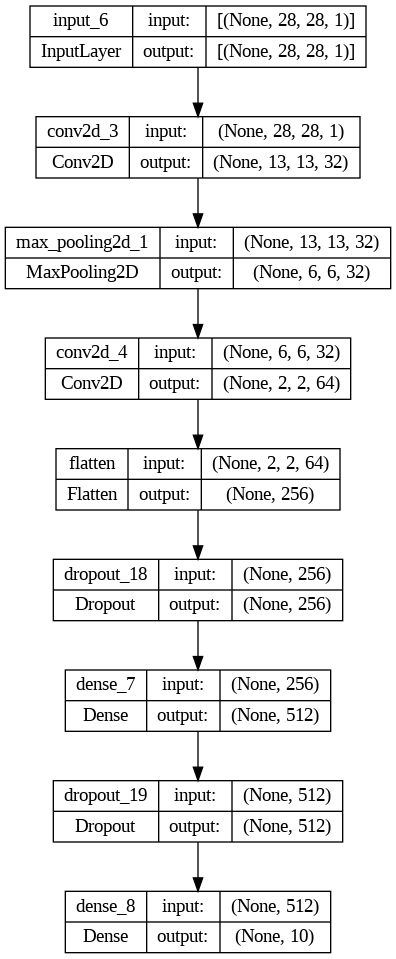

In [128]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [129]:
# training the CNN model
model_history = model.fit(training_images, training_labels, epochs=20,
                          validation_data=(test_images, test_labels),
                          verbose=1)

Epoch 1/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.6031 - accuracy: 0.7771 - val_loss: 0.4687 - val_accuracy: 0.8268
Epoch 2/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4338 - accuracy: 0.8395 - val_loss: 0.3988 - val_accuracy: 0.8560
Epoch 3/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3900 - accuracy: 0.8536 - val_loss: 0.3799 - val_accuracy: 0.8616
Epoch 4/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3617 - accuracy: 0.8651 - val_loss: 0.3654 - val_accuracy: 0.8653
Epoch 5/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3415 - accuracy: 0.8725 - val_loss: 0.3530 - val_accuracy: 0.8680
Epoch 6/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3256 - accuracy: 0.8778 - val_loss: 0.3329 - val_accuracy: 0.8787
Epoch 7/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3111 - accuracy: 0.8830 - val_loss: 0.3395 -

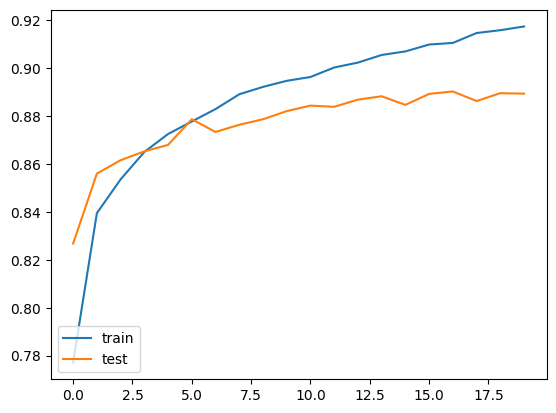

In [130]:
# plotting accuracy
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'], label = 'accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(['train', 'test'], loc='lower left')

In [131]:
# making predictions on a single image
output = model.predict(test_images)
prediction = np.argmax(output[9])
print(prediction)

313/313 [==============================] - 1s 3ms/step
7


**Chapter 10**

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns

In [133]:
# importing the dataset
iris_df = sns.load_dataset("iris")

# print dataset header
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [134]:
# creating feature set
X = iris_df.drop(['species'], axis=1)

# creating label set
y = iris_df['species']

# converting labels to numbers
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [135]:
# dividing data into 80-20% training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [136]:
# applying scaling on training and test data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [137]:
# importing PCA class
from sklearn.decomposition import PCA

# creating object of the PCA class
pca = PCA()

# training PCA model on training data
X_train = pca.fit_transform(X_train)

# making predictions on test data
X_test = pca.transform(X_test)

In [138]:
# printing variance ratios
variance_ratios = pca.explained_variance_ratio_
print(variance_ratios)

[0.72229951 0.2397406  0.03335483 0.00460506]


In [139]:
# use one principal component
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [140]:
# making predictions using logistic regression
from sklearn.linear_model import LogisticRegression

# training the logistic regression model
lg = LogisticRegression()
lg.fit(X_train, y_train)

# predicting the Test set results
y_pred = lg.predict(X_test)

# evaluating results

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.8666666666666667


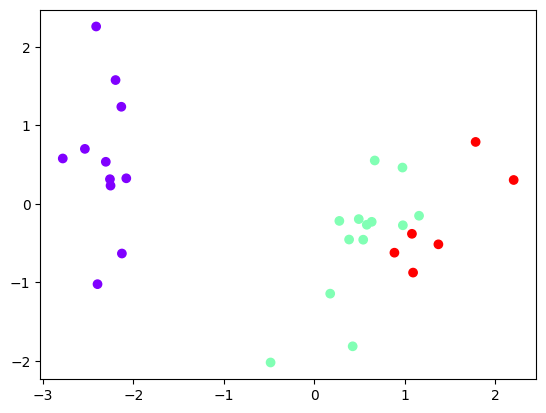

In [141]:
from matplotlib import pyplot as plt
%matplotlib inline

# print actual datapoints

plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='rainbow')

In [143]:
# importing dataset
banknote_df = pd.read_csv("bank_notes.csv")
# displaying dataset header
banknote_df.head()

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [145]:
# dividing data into features and labels
X = banknote_df.drop(["Target"], axis = 1)
y = banknote_df.filter(["Target"], axis = 1)

In [146]:
# dividing data into 80-20% training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [147]:
# applying scaling on training and test data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [149]:
# importing LDA class
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# creating object of the LDA class
lda = LDA()

# training PCA model on training data
X_train = lda.fit_transform(X_train, y_train)

# making predictions on test data
X_test = lda.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [150]:
# printing variance ratios
variance_ratios = lda.explained_variance_ratio_
print(variance_ratios)

[1.]


In [151]:
# creating object of the LDA class
lda = LDA(n_components = 1)

# training PCA model on training data
X_train = lda.fit_transform(X_train, y_train)

# making predictions on test data
X_test = lda.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [152]:
# making predictions using logistic regression
from sklearn.linear_model import LogisticRegression

# training the logistic regression model
lg = LogisticRegression()
lg.fit(X_train, y_train)

# predicting the Test set results
y_pred = lg.predict(X_test)

# evaluating results
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9890909090909091


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
